In [1]:
import pandas as pd
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import math

In [2]:
df = pd.read_csv('spotify_data.csv')

In [3]:
df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['Month'] = df['Date'].dt.month_name()

In [6]:
df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,Month
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,January
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec,January
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec,January
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec,January
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec,January


In [7]:
df['DayOfWeek'] = df['Date'].dt.day_name()

In [8]:
df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,Month,DayOfWeek
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,January,Sunday
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec,January,Sunday
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec,January,Sunday
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec,January,Sunday
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec,January,Sunday


<BarContainer object of 54 artists>

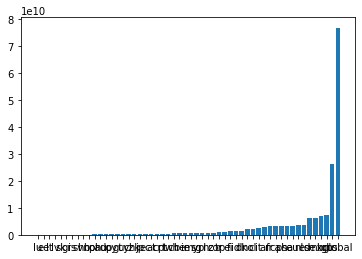

In [9]:
plt.bar(df.groupby(['Region']).sum().sort_values(by = 'Streams').index,df.groupby(['Region']).sum().sort_values(by = 'Streams').values[:,1])

<BarContainer object of 12 artists>

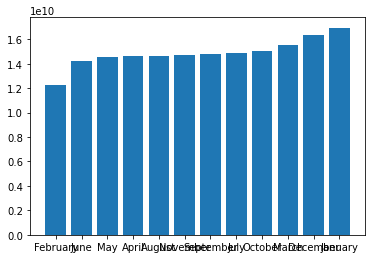

In [10]:
plt.bar(df.groupby(['Month']).sum().sort_values(by = 'Streams').index,df.groupby(['Month']).sum().sort_values(by = 'Streams').values[:,1])

<BarContainer object of 7 artists>

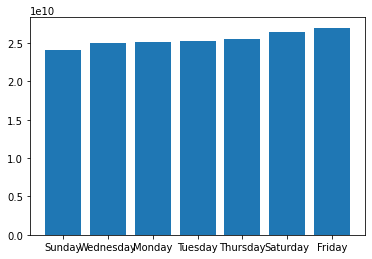

In [11]:
plt.bar(df.groupby(['DayOfWeek']).sum().sort_values(by = 'Streams').index,df.groupby(['DayOfWeek']).sum().sort_values(by = 'Streams').values[:,1])

In [12]:
df.groupby(['Artist']).sum().sort_values(by = 'Streams')[::-1][0:10]

,Position,Streams
Artist,,
Ed Sheeran,10534351,8913973976
Drake,4679189,4523630992
The Chainsmokers,5304084,4292590087
Post Malone,2466648,3700404149
Kendrick Lamar,2471880,3570665303
Luis Fonsi,1442101,3555514919
J Balvin,1986826,2494735971
Calvin Harris,3110608,2397708371
Imagine Dragons,2727838,2322921399


<BarContainer object of 10 artists>

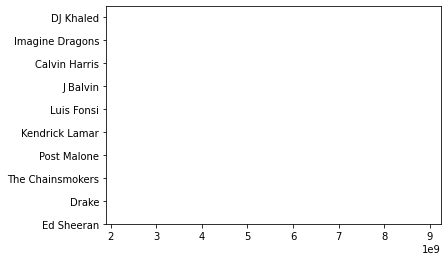

In [13]:
#Top 10 Popular Artist
plt.bar(df.groupby(['Artist']).sum().sort_values(by = 'Streams')[::-1][0:10].values[:,1],df.groupby(['Artist']).sum().sort_values(by = 'Streams')[::-1][0:10].index)

In [14]:
df.groupby(['Artist']).count()['Track Name'].sort_values()

Artist
龔詩嘉                        1
MMXJ                       1
MUTO                       1
MXM (BRANDNEWBOYS)         1
MY BABY                    1
                       ...  
Imagine Dragons        37992
Calvin Harris          38460
Drake                  49054
The Chainsmokers       68321
Ed Sheeran            127064
Name: Track Name, Length: 6628, dtype: int64

In [15]:
df.groupby(['Track Name']).sum().sort_values(by = 'Streams')[::-1][0:10]

,Position,Streams
Track Name,,
Shape of You,301513,2993988783
Despacito - Remix,477232,1829621841
Despacito (Featuring Daddy Yankee),816152,1460802540
Something Just Like This,725122,1386258295
Unforgettable,722129,1366919951
HUMBLE.,854060,1311243745
rockstar,127973,1260181617
I'm the One,548303,1254196301
It Ain't Me (with Selena Gomez),865603,1190339348


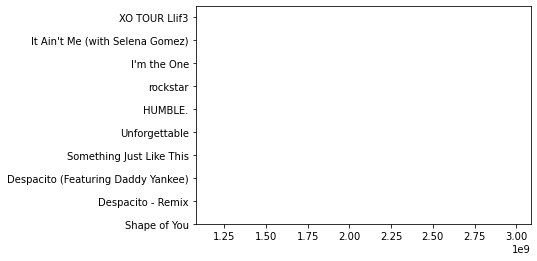

In [16]:
ax = plt.bar(df.groupby(['Track Name']).sum().sort_values(by = 'Streams')[::-1][0:10].values[:,1],df.groupby(['Track Name']).sum().sort_values(by = 'Streams')[::-1][0:10].index)

In [17]:
df['score'] = df['Position'].apply(lambda x : 201-x)

In [18]:
df

,Position,Track Name,Artist,Streams,URL,Date,Region,Month,DayOfWeek,score
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,January,Sunday,200
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec,January,Sunday,199
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec,January,Sunday,198
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec,January,Sunday,197
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec,January,Sunday,196
...,...,...,...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk,January,Tuesday,5
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk,January,Tuesday,4
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk,January,Tuesday,3
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk,January,Tuesday,2


In [19]:
df1 = pd.DataFrame(df.groupby(['Track Name']).sum().sort_values(by = 'score')[::-1]['score'])

In [20]:
df2 = pd.DataFrame(df.groupby(['Track Name']).count()['Streams'])

In [21]:
df1.shape,df2.shape

((18597, 1), (18597, 1))

In [22]:
df3 = df1.join(df2)

In [23]:
df1

,score
Track Name,
Shape of You,3590852
Something Just Like This,2529872
Despacito (Featuring Daddy Yankee),2456932
Believer,2233380
Attention,2110145
...,...
Podatek od miłości,1
Scarred For Life,1
Fuchs,1


In [24]:
df2.loc['Shape of You']

Streams    19365
Name: Shape of You, dtype: int64

In [25]:
df1.loc['Shape of You']

score    3590852
Name: Shape of You, dtype: int64

In [26]:
df3

,score,Streams
Track Name,,
Shape of You,3590852,19365
Something Just Like This,2529872,16194
Despacito (Featuring Daddy Yankee),2456932,16284
Believer,2233380,16775
Attention,2110145,13319
...,...,...
Podatek od miłości,1,1
Scarred For Life,1,1
Fuchs,1,1


In [27]:
df3['Track Name'] = df3.index

In [28]:
df3

,score,Streams,Track Name
Track Name,,,
Shape of You,3590852,19365,Shape of You
Something Just Like This,2529872,16194,Something Just Like This
Despacito (Featuring Daddy Yankee),2456932,16284,Despacito (Featuring Daddy Yankee)
Believer,2233380,16775,Believer
Attention,2110145,13319,Attention
...,...,...,...
Podatek od miłości,1,1,Podatek od miłości
Scarred For Life,1,1,Scarred For Life
Fuchs,1,1,Fuchs


In [29]:
df3.rename({'Streams':'Count'},axis=1,inplace=True)

In [30]:
df3['Avg'] = df3['score']/df3['Count']

In [31]:
df3

,score,Count,Track Name,Avg
Track Name,,,,
Shape of You,3590852,19365,Shape of You,185.430003
Something Just Like This,2529872,16194,Something Just Like This,156.222799
Despacito (Featuring Daddy Yankee),2456932,16284,Despacito (Featuring Daddy Yankee),150.880128
Believer,2233380,16775,Believer,133.137407
Attention,2110145,13319,Attention,158.431189
...,...,...,...,...
Podatek od miłości,1,1,Podatek od miłości,1.000000
Scarred For Life,1,1,Scarred For Life,1.000000
Fuchs,1,1,Fuchs,1.000000


In [32]:
df3.sort_values(by = ['Avg'],ascending=False)

,score,Count,Track Name,Avg
Track Name,,,,
Ligesom Mig,995,5,Ligesom Mig,199.000000
Solmussa (feat. BEHM),7956,40,Solmussa (feat. BEHM),198.900000
Ungir Strákar - Deep Mix,6743,34,Ungir Strákar - Deep Mix,198.323529
Já ég veit,16642,84,Já ég veit,198.119048
İmkansızım,10672,54,İmkansızım,197.629630
...,...,...,...,...
OH MY LITTLE GIRL,1,1,OH MY LITTLE GIRL,1.000000
The Story Never Ends - Piano Version,1,1,The Story Never Ends - Piano Version,1.000000
I Love You Boy,1,1,I Love You Boy,1.000000


In [33]:
df.groupby(['Artist']).sum().sort_values(by = 'Streams')[::-1][0:10].values[:,1]

array([8913973976, 4523630992, 4292590087, 3700404149, 3570665303,
       3555514919, 2494735971, 2397708371, 2322921399, 2236224259])

In [34]:
df.groupby(['Artist']).sum().sort_values(by = 'Streams')[::-1][0:10].index

Index(['Ed Sheeran', 'Drake', 'The Chainsmokers', 'Post Malone',
       'Kendrick Lamar', 'Luis Fonsi', 'J Balvin', 'Calvin Harris',
       'Imagine Dragons', 'DJ Khaled'],
      dtype='object', name='Artist')

In [35]:
df10 = pd.DataFrame(df.groupby(['Artist']).sum().sort_values(by = 'Streams')[::-1][0:10].values[:,1],df.groupby(['Artist']).sum().sort_values(by = 'Streams')[::-1][0:10].index)

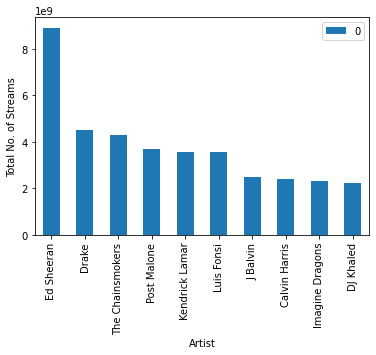

In [36]:
#fig = plt.figure(figsize=(7,5))
ax = df10.plot.bar()
ax.set_ylabel('Total No. of Streams')
plt.savefig('Top10Artists.pdf',bbox_inches = 'tight')

In [37]:
df11 = pd.DataFrame(df.groupby(['Track Name']).sum().sort_values(by = 'Streams')[::-1][0:10].values[:,1],df.groupby(['Track Name']).sum().sort_values(by = 'Streams')[::-1][0:10].index)

Text(0, 0.5, 'Total No. of Streams')

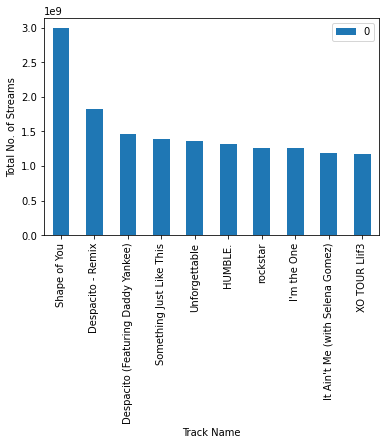

In [38]:
ax = df11.plot.bar()
ax.set_ylabel('Total No. of Streams')
#plt.savefig('Top10Tracks.pdf',bbox_inches = 'tight')

In [39]:
df12 = pd.DataFrame(df.groupby(['DayOfWeek']).sum().sort_values(by = 'Streams').values[:,1],df.groupby(['DayOfWeek']).sum().sort_values(by = 'Streams').index,)

Text(0, 0.5, 'Total No. of Streams')

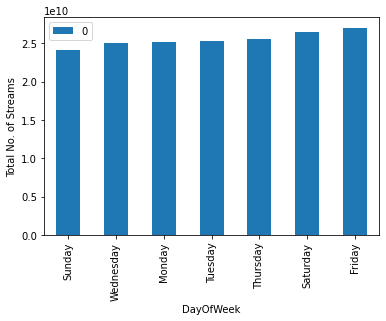

In [40]:
ax = df12.plot.bar()
ax.set_ylabel('Total No. of Streams')
#plt.savefig('DayOfWeek.pdf',bbox_inches = 'tight')

In [41]:
df13 = pd.DataFrame(df.groupby(['Month']).sum().sort_values(by = 'Streams').values[:,1],df.groupby(['Month']).sum().sort_values(by = 'Streams').index)

Text(0, 0.5, 'Total No. of Streams')

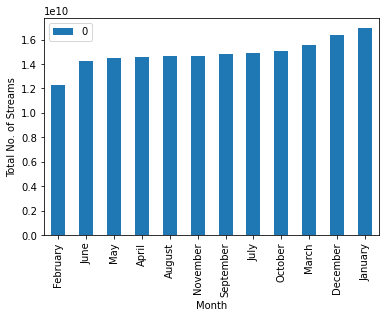

In [42]:
ax = df13.plot.bar()
ax.set_ylabel('Total No. of Streams')
#plt.savefig('Months.pdf',bbox_inches = 'tight')

In [43]:
df14 = pd.DataFrame(df.groupby(['Region']).sum().sort_values(by = 'Streams').values[:,1],df.groupby(['Region']).sum().sort_values(by = 'Streams').index)

Text(0, 0.5, 'Total No. of Streams')

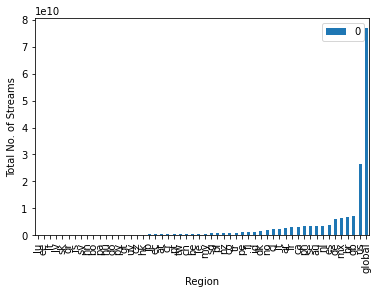

In [44]:
ax = df14.plot.bar()
ax.set_ylabel('Total No. of Streams')

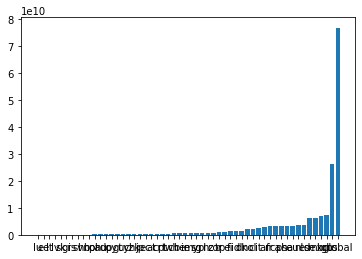

In [45]:
ax = plt.bar(df.groupby(['Region']).sum().sort_values(by = 'Streams').index,df.groupby(['Region']).sum().sort_values(by = 'Streams').values[:,1])

<BarContainer object of 54 artists>

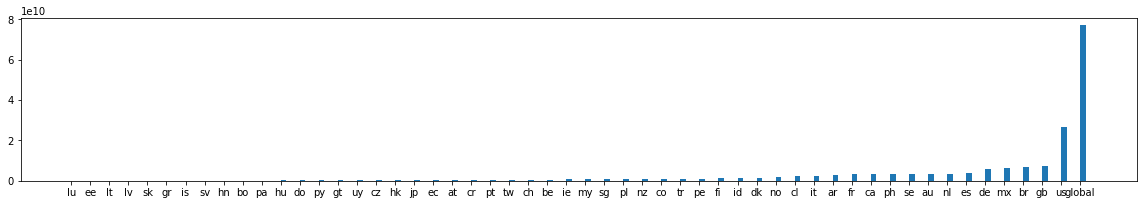

In [46]:
plt.figure(figsize=(20, 3))  # width:20, height:3
plt.bar(df.groupby(['Region']).sum().sort_values(by = 'Streams').index, df.groupby(['Region']).sum().sort_values(by = 'Streams').values[:,1], align='edge', width=0.3)
#plt.savefig('regions.pdf',bbox_inches = 'tight')

In [47]:
df13

,0
Month,
February,12286996626
June,14236839633
May,14518200794
April,14595379550
August,14619134413
November,14682201305
September,14820585163
July,14865263239
October,15063803541


In [50]:
df.groupby(['Region']).sum().sort_values(by = 'Streams')

,Position,Streams,score
Region,,,
lu,46878,6018470,776820
ee,327879,21653223,2249544
lt,484163,30363701,2892436
lv,568652,33654223,3323713
sk,745742,42731609,3796255
gr,1037056,58780418,4428536
is,1862133,80100254,5340702
sv,2110371,80421329,5707122
hn,2407769,91375818,5990413
